In [1]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

In [2]:
outlook = 'overcast,overcast,overcast,overcast,rainy,rainy,rainy,rainy,rainy,sunny,sunny,sunny,sunny,sunny'.split(',')
temp = 'hot,cool,mild,hot,mild,cool,cool,mild,mild,hot,hot,mild,cool,mild'.split(',')
humidity = 'high,normal,high,normal,high,normal,normal,normal,high,high,high,high,normal,normal'.split(',')
windy = 'FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE'.split(',')
play = 'yes,yes,yes,yes,yes,yes,no,yes,no,no,no,no,yes,yes'.split(',')

In [3]:
dataset ={'outlook':outlook,'temp':temp,'humidity':humidity,'windy':windy,'play':play}
df = pd.DataFrame(dataset,columns=['outlook','temp','humidity','windy','play'])

In [4]:
df

,outlook,temp,humidity,windy,play
0,overcast,hot,high,FALSE,yes
1,overcast,cool,normal,TRUE,yes
2,overcast,mild,high,TRUE,yes
3,overcast,hot,normal,FALSE,yes
4,rainy,mild,high,FALSE,yes
5,rainy,cool,normal,FALSE,yes
6,rainy,cool,normal,TRUE,no
7,rainy,mild,normal,FALSE,yes
8,rainy,mild,high,TRUE,no
9,sunny,hot,high,FALSE,no


In [6]:
df['outlook'] = df['outlook'].map({'overcast': 0, 'rainy': 1, 'sunny':2})

In [7]:
df['temp'] = df['temp'].map({'hot': 0, 'cool': 1, 'mild':2})

In [8]:
df['humidity'] = df['humidity'].map({'high': 0, 'normal': 1})

In [9]:
df['windy'] = df['windy'].map({'FALSE': 0, 'TRUE': 1})

In [10]:
df

,outlook,temp,humidity,windy,play
0,0,0,0,0,yes
1,0,1,1,1,yes
2,0,2,0,1,yes
3,0,0,1,0,yes
4,1,2,0,0,yes
5,1,1,1,0,yes
6,1,1,1,1,no
7,1,2,1,0,yes
8,1,2,0,1,no
9,2,0,0,0,no


In [11]:
X = df.drop('play', axis=1)
y = df['play']

In [12]:
X

,outlook,temp,humidity,windy
0,0,0,0,0
1,0,1,1,1
2,0,2,0,1
3,0,0,1,0
4,1,2,0,0
5,1,1,1,0
6,1,1,1,1
7,1,2,1,0
8,1,2,0,1
9,2,0,0,0


In [13]:
y

0     yes
1     yes
2     yes
3     yes
4     yes
5     yes
6      no
7     yes
8      no
9      no
10     no
11     no
12    yes
13    yes
Name: play, dtype: object

In [14]:
y.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [27]:
from sklearn import tree
model = tree.DecisionTreeClassifier() #criterion='entropy', max_depth=2

In [28]:
model

DecisionTreeClassifier()

In [29]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.5

[Text(0.6666666666666666, 0.875, 'humidity <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]\nclass = no'),
 Text(0.5, 0.625, 'outlook <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = yes'),
 Text(0.3333333333333333, 0.375, 'windy <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = no'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = no'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = yes'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = yes'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = no')]

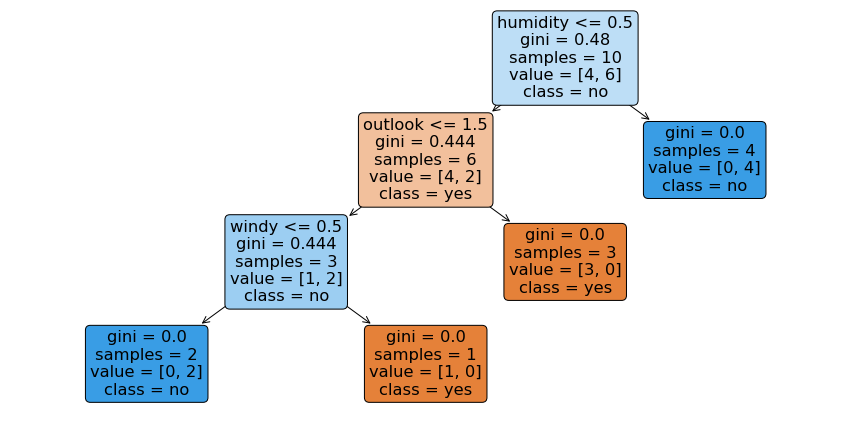

In [31]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(model, 
          filled=True, 
          rounded=True, 
          class_names=["yes", "no"], 
          feature_names=X.columns) 